# Creating Functions

## Questions

- How can I define new functions?

- What’s the difference between defining and calling a function?

- What happens when I call a function?

## Objectives

- Define a function that takes parameters.

- Return a value from a function.

- Set default values for function parameters.

- Document our functions.

- Explain why we should divide programs into small, single-purpose functions.

At this point, we’ve written code to draw some interesting features in our data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ — a shorthand way of re-executing longer pieces of code. Let’s start by defining a function `fahr_to_celsius` that converts temperatures from Fahrenheit to Celsius:

In [ ]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

![python function](media/python-function.svg)

The function definition opens with the keyword `def` followed by the name of the function (`fahr_to_celsius`) and a parenthesized list of parameter names (`temp`). The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a `return` keyword followed by the return value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function.



In [2]:
# This command should call our function, using “32” as the input and return the function value.
fahr_to_celsius(32)

0.0

In fact, calling our own function is no different from calling any other function:

In [3]:
print('freezing point of water:', fahr_to_celsius(32), '°C')
print('boiling point of water:', fahr_to_celsius(212), '°C')

freezing point of water: 0.0 °C
boiling point of water: 100.0 °C


We’ve successfully called the function that we defined, and we have access to the value that we returned.

# Composing Functions

Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:

In [4]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:

In [5]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

# Tidying Up

Now that we know how to wrap bits of code up in functions, we can make our luminance analysis easier to read and easier to reuse. First, let’s make a visualize function that generates our plots and a cross-section-finder function.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def find_data_cross_section(simulation_filename):
    simulation = np.loadtxt(fname=simulation_filename, skiprows=52)
    assert len(simulation) > 0

    x_simulation = simulation[:, 0]
    y_simulation = simulation[:, 1]
    L_simulation = simulation[:, 2]
    smallest_y = np.amin(abs(y_simulation))
    x_cross_section = x_simulation[y_simulation==smallest_y]
    luminance_cross_section = L_simulation[y_simulation==smallest_y]

    return x_cross_section, luminance_cross_section


def visualize(experiment_filename, simulation_filename):

    experiment = np.loadtxt(fname=experiment_filename, delimiter=',')
    x, luminance = find_data_cross_section(simulation_filename)


    fig = plt.figure()
    # just a single plot needed here
    ax = fig.add_subplot(111)
    ax.plot(x, luminance, label='simulation')
    ax.plot(experiment[:,0], experiment[:, 1], marker='+', linestyle=' ', label='experiment')
    
    # set the labels
    ax.set_xlabel('x position [mm]')
    ax.set_ylabel('Luminance [Cd/m^2]')
    ax.set_title(filename)
    ax.legend()
    
    # plt.show() always makes the plot appear that has been drawn. 
    # It is redundant in jupyter notebooks but necessary in scripts!
    plt.show()

and another function called `calculate_average_luminance` that finds the average luminance over the LEDs:

In [2]:
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

Wait! Didn’t we forget to specify what the visualize function should return? Well, we didn’t. In Python, functions are not required to include a `return` statement and can be used for the sole purpose of grouping together pieces of code that conceptually do one thing. In such cases, function names usually describe what they do, e.g. `visualize`.

Notice that rather than jumbling this code together in one giant `for` loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler `for` loop:

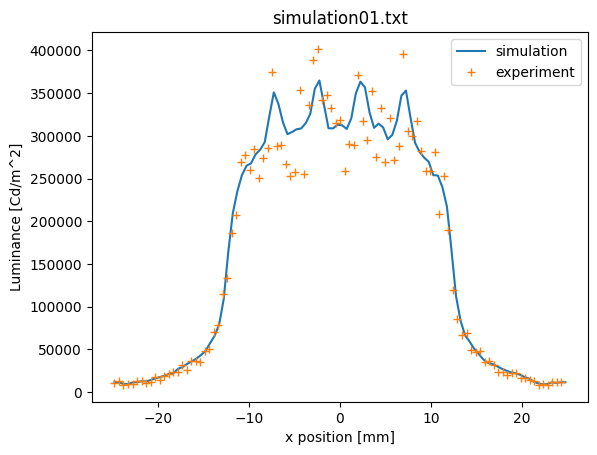

Experiment & Simulation difference = 3.319310065215488 %


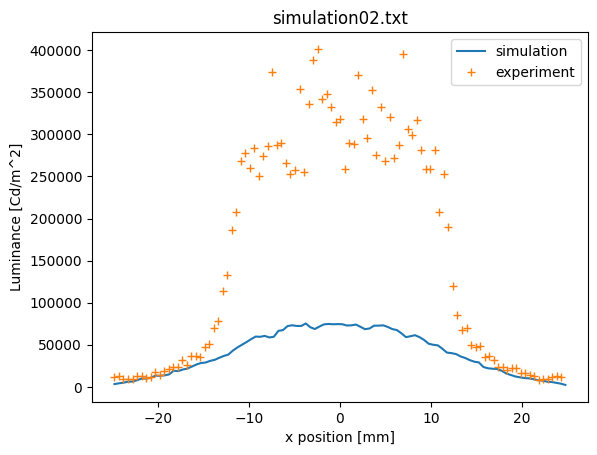

Experiment & Simulation difference = 77.88975272561785 %


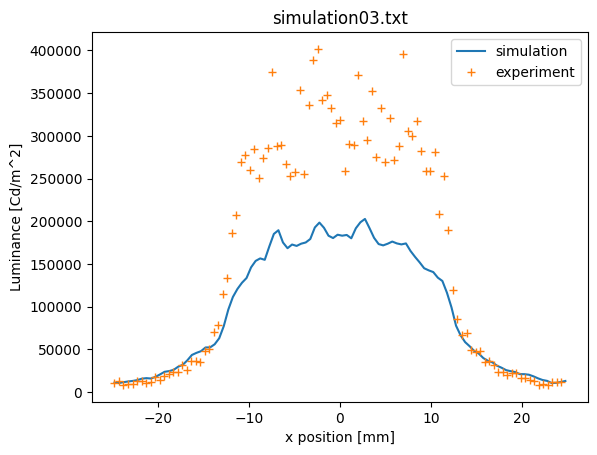

Experiment & Simulation difference = 42.73462211252939 %


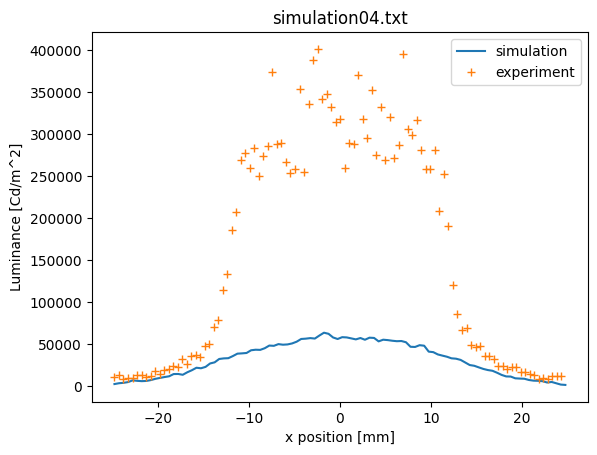

Experiment & Simulation difference = 82.72425871918331 %


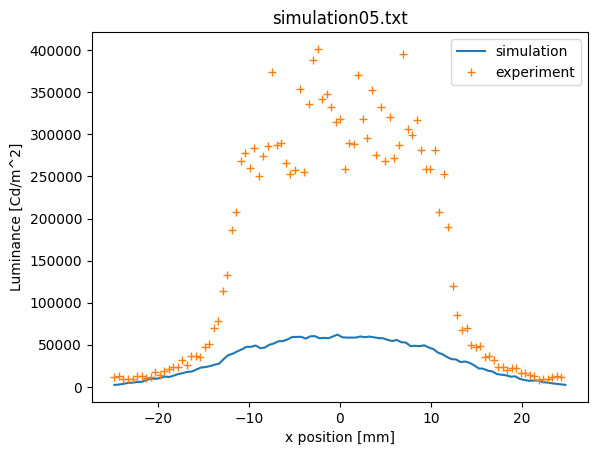

Experiment & Simulation difference = 81.94342576807645 %


In [3]:
import glob 


filenames = sorted(glob.glob('simulation*.txt'))  # sorted is another built-in function that sorts our list of files

for filename in filenames:
    visualize('experiment01.csv', filename)
    
    x, luminance = find_data_cross_section(filename)
    simulation_average = calculate_average_luminance(x, luminance)
    
    experiment = np.loadtxt(fname='experiment01.csv', delimiter=',')
    experiment_average = calculate_average_luminance(experiment[:,0], experiment[:,1])
    
    percentage_difference = abs(simulation_average - experiment_average)*100./experiment_average
    
    # str() can be used as a function to convert python objects into strings
    print('Experiment & Simulation difference = ' + str(percentage_difference) + ' %')

By giving our functions human-readable names, we can more easily read and understand what is happening in the for loop. Even better, if at some later date we want to use either of those pieces of code again, we can do so in a single line.

> # Aside: Testing 
>
> Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s test our average-calculating function, reproduced below for ease. We cover testing in more detail in the next lesson, but here we include this aside on how to test effectively.



In [9]:
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

> We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create some cases we *know* to be correct and make sure it returns the correct answer!
> 
> ## First Test
> 
> When testing it is important to constantly challenge any assumptions you may have. It uncovers bugs because we *thought* the system *obviously* would behave in a certain way, and then we find it actually doesn't.
>
> So here we should test something obvious. If we provide luminance of just zeros, then our average should be zero. Let's check!

In [4]:
x = np.arange(-20, 20, 1)
luminance = np.zeros((40))

result = calculate_average_luminance(x, luminance)
assert result == 0., "this is the error"

> That looks right! Now let's try something a bit more complex.
>
> ## Second Test
>
> We should test that if we provide non-zero values for luminance in the region, we're checking we get that nonzero value back!

In [5]:
x = np.arange(-20, 20, 1)
luminance = np.zeros((40))
luminance[np.logical_and(x<=10., x>=-10.)] += 1.

result = calculate_average_luminance(x, luminance)
assert result == 1.

> So far so good. But so far, we've been checking what are commonly known as "Happy" cases. We've been testing how the function behaves when it receives what it's supposed to and that it behaves correctly. But there's another type of case that's just as (if not more) important the "Unhappy" case. In the unhappy case we feed the function deliberately incorrect inputs to check that it handles them as we expect.
>
> ## Third Test - Unhappy Case
>
> It is tricky to test unhappy cases without using a specialized testing library because it throws so many errors. But, here we will write some erroneous code and check that the error we get is what we expected to see.
>
> E.g. let's feed in two lists, instead of numpy arrays. We would expect to get a `TypeError` as the type of the object we've supplied is incorrect. 

In [6]:
x = list(np.arange(-20, 20, 1))
luminance = list(np.zeros((40)))
print(type(x), type(luminance))

result = calculate_average_luminance(x, luminance)

<class 'list'> <class 'list'>


TypeError: '<=' not supported between instances of 'list' and 'float'

> That is indeed what we find! We'll return to discuss testing a bit more in a later lesson.
>
> > **Note:** There are a number of ways of formalizing tests for code you have written. The easiest to pick up among these is the python library *pytest*. The ins and outs of this package are covered in the advanced testing course; for now, it is enough to know such things exist and that testing your code using more code is a good idea!

# Documenting

We have one more task first, though. We should write some documentation for our function to remind ourselves later what it’s for and how to use it. There are two common ways to put documentation in software. The first is to add comments like this:

In [7]:
# This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
# which is defined in the first array.
def calculate_average_luminance(x, luminance):
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

There’s a better way, though. If the first thing in a function is a string that is not assigned to a variable, that string is attached to the function as its documentation:

In [8]:
def calculate_average_luminance(x, luminance):
    """This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array."""
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

This is better because we can now ask Python’s built-in help system to show us the documentation for the function:

In [9]:
help(calculate_average_luminance)

Help on function calculate_average_luminance in module __main__:

calculate_average_luminance(x, luminance)
    This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.



A string like this is called a docstring. We do not need to use triple quotes when we write one, but if we do, we can break the string across multiple lines:

In [10]:
def calculate_average_luminance(x, luminance):
    """This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.

    Examples
    --------
    >>> x = np.array([-20, -10, 0, 10, 20])
    >>> L = np.array([0, 2, 5, 2, 0])
    >>> calculate_average_luminance(x, L)
    3.0
    """
    boolean_array = np.logical_and(x<=10., x>= -10.)
    average_luminance = np.mean(luminance[boolean_array])
    return average_luminance

help(calculate_average_luminance)

Help on function calculate_average_luminance in module __main__:

calculate_average_luminance(x, luminance)
    This function takes two numpy arrays and calculates the average value of the second over the region -10 to 10, 
    which is defined in the first array.
    
    Examples
    --------
    >>> x = np.array([-20, -10, 0, 10, 20])
    >>> L = np.array([0, 2, 5, 2, 0])
    >>> calculate_average_luminance(x, L)
    3.0



> **Note:** triple quote docstrings are *actually* strings and can be used as such. It is not common to see them in python programs but if you have a long, multi-line, hardcoded string, it is common to put it in triple quotes. For example:
> ```Python
> my_long_string = """It’s all wrong
> By rights we shouldn’t even be here.
> But we are.
> It’s like in the great stories Mr. Frodo.
> The ones that really mattered.
> Full of darkness and danger they were,
> and sometimes you didn’t want to know the end.
> Because how could the end be happy.
> How could the world go back to the way it was when so much bad happened.
> But in the end, it’s only a passing thing, this shadow.
> Even darkness must pass.
> A new day will come.
> And when the sun shines it will shine out the clearer.
> Those were the stories that stayed with you.
> That meant something.
> Even if you were too small to understand why.
> But I think, Mr. Frodo, I do understand.
> I know now.
> Folk in those stories had lots of chances of turning back only they didn’t.
> Because they were holding on to something."""
> ```
>
> Additionally triple quotes using the single quote character `'` can be used but are very unusual, and not recommended.

# Defining Defaults

We touched on this in an earlier lesson, but here we will go into it in more detail. We have passed arguments to functions in two ways: directly, as in `type(data)`, and by name, as in `np.loadtxt(fname='something.csv', delimiter=',')`. In fact, we can pass the filename to `loadtxt` without the `fname=`:

In [23]:
np.loadtxt('experiment01.csv', delimiter=',')

but we still need to say `delimiter=`:

```Python
np.loadtxt('experiment01.csv', ',')
```

will throw an error.

```
Traceback (most recent call last):

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)

  File "<ipython-input-22-1d44534e11cb>", line 2, in <module>
    np.loadtxt('experiment01.csv', ',')

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\npyio.py", line 1055, in loadtxt
    dtype = np.dtype(dtype)

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_internal.py", line 199, in _commastring
    newitem = (dtype, ast.literal_eval(repeats))

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\ast.py", line 59, in literal_eval
    node_or_string = parse(node_or_string, mode='eval')

  File "c:\users\jderrick\appdata\local\programs\python\python38\lib\ast.py", line 47, in parse
    return compile(source, filename, mode, flags,

  File "<unknown>", line 1
    ,
    ^
SyntaxError: unexpected EOF while parsing

```

To understand what’s going on, let's define a simple function.

In [25]:
def print_name_and_job(name, job):
    print('my name is ' + name)
    print('my job is '+ job)

If we call it as it is.

In [26]:
print_name_and_job('Samwise', 'Gardener')

my name is Samwise
my job is Gardener


It works fine, but let's say we're only using this in the context of the fellowship and really the job title is most likely to be "fellowship member". We want to default to this if nothing is provided.

The key change is that the second parameter is now written `job='fellowship'` instead of just `job`. If we call the function with two arguments, it works as it did before:

In [29]:
def print_name_and_job(name, job='fellowship member'):
    print('my name is ' + name)
    print('my job is '+ job)

In [30]:
print_name_and_job('Frodo', 'ring-bearer')

my name is Frodo
my job is ring-bearer


But we can also now call it with just one argument, in which case `job` is automatically assigned the default value of `fellowship member`:

In [31]:
print_name_and_job('Boromir')

my name is Boromir
my job is fellowship member


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass an argument when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to arguments:

In [ ]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no arguments:')
display()
print('one arguments:')
display(55)
print('two arguments:')
display(55, 66)

As this example shows, arguments are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:

In [ ]:
print('only setting the value of c')
display(c=77)

With that in hand, let’s look at the help for `numpy.loadtxt`:

In [2]:
import numpy as np


help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, like=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
  

There is a lot of information here, but the most important part is the first couple of lines:
```
loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
```

(if you see something a bit different, you may have a different version of numpy than the one this course was created using: 1.19.4)

This tells us that `loadtxt` has one parameter called `fname` that doesn’t have a default value, and eight others that do. If we call the function like this:

```Python
np.loadtxt('experiment01.csv', ',')
```

then the filename is assigned to `fname` (which is what we want), but the delimiter string `','` is assigned to `dtype` rather than `delimiter`, because `dtype` is the second parameter in the list. However `','` isn’t a known `dtype` so our code will produce an error message when we try to run it. When we call `loadtxt` we don’t have to provide `fname=` for the filename because it’s the first item in the list, but if we want the `','` to be assigned to the variable `delimiter`, we do have to provide `delimiter=` for the second parameter since `delimiter` is not the second parameter in the list.

> **Note on "argument" vs "parameter":** The terms "argument" and "parameter" do have specific differences, although it is often difficult to discern what they are. The best distinction I am aware of is as follows: "Technically, parameters are variables in a function definition and arguments are the actual values given to the variables at the point of call. For example: 
> ```Python
> def foo(arg): 
>     return arg 
> foo('Python') 
> ```
> The variable arg in the function definition is the parameter and the value Python in the function call is an argument to that parameter." (from the answer provided [here](https://cmsdk.com/python/what-is-the-difference-between-argument-and-parameter-in-python.html#:~:text=Technically%2C%20parameters%20are%20variables%20in%20a%20function%20definition,function%20call%20is%20an%20argument%20to%20that%20parameter)). Confusion often arises, however, because the parameters are often named "`arg`" (as in the example) because they are used to store the arguments when the function is called! In our discussion above, `delimiter` is the parameter and `,` is the argument.
> 
> The distinction is unimportant at the beginner level, but the use of both words is extremely common and should be noted!

# Readable Functions

Consider these two functions:

```Python
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))
```

The functions `s` and `std_dev` are computationally equivalent (they both calculate the sample standard deviation), but to a human reader, they look quite different. You probably found `std_dev` much easier to read and understand than `s`.

As this example illustrates, both documentation and a programmer’s coding style combine to determine how easy it is for others to read and understand the programmer’s code. Choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code. This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!

# Exercise 1 - Combining Strings

“Adding” two strings produces their concatenation: `'a' + 'b'` is `'ab'`. Write a function called `fence` that takes two parameters called `original` and `wrapper` and returns a new string that has the `wrapper` character at the beginning and end of the original. A call to your function should look like this:
```Python
print(fence('name', '*'))
> *name*
```

In [12]:
# Enter your solution here
def fence(original, wrapper):
    return wrapper + original + wrapper

print(fence('money', '$'))

$money$


# Exercise 2* `return` vs `print()`

Note that `return` and `print` are not interchangeable. `print` is a Python function that prints data to the screen. It enables us, users, to see the data. The `return` statement, on the other hand, makes data visible to the program. Let’s have a look at the following function:

```Python
def add(a, b):
    print(a + b)
```

Question: What will we see if we execute the following commands?

```Python
A = add(7, 3)
print(A)
```

In [13]:
# Enter your solution here
def add(a, b):
    print(a + b)

A = add(7, 3)
print(A)

10
None


# Exercise 3* - Selecting Characters From Strings

If the variable `s` refers to a string, then `s[0]` is the string’s first character and `s[-1]` is its last. Write a function called `outer` that returns a string made up of just the first and last characters of its input. A call to your function should look like this:

```Python
print(outer('helium'))
> 'hm'
```

In [16]:
# Enter your solution here
def outer(some_string):
    return some_string[0] + some_string[-1]

print(outer('helium'))

hm


# Exercise 4 - Normalising an Array

Write a function `normalise` that takes the following array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0. (Hint: If `L` and `H` are the lowest and highest values in the original array, then the replacement for a value `v` should be `(v-L) / (H-L)`.)

In [36]:
import numpy as np


test = np.arange(11)
# Enter your solution here
print(f'Test array is: \n {test}')

def normalise(an_array):
    result = []
    array_max = np.amax(an_array)
    array_min = np.amin(an_array)
    
    for i in an_array:
        result.append((i - array_min) / (array_max - array_min))
    return result

print(normalise(test))

Test array is: 
 [ 0  1  2  3  4  5  6  7  8  9 10]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


# Exercise 5 - Testing and Documenting Your Function

Run the commands `help(np.arange)` and `help(np.linspace)` to see how to use these functions to generate regularly spaced values. Try using linspace to test the limits of `normalize`, and  add a docstring to it that explains what it does.

In [35]:
# Enter your solution here
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

# Exercise 6 - Defining Defaults

Rewrite the normalize function so that it scales data to lie between 0.0 and 1.0 by default, but will allow the caller to specify lower and upper bounds if they want. Discuss your implementation with others if you can. Do the functions always behave the same way?

In [ ]:
# Enter your solution here

# Exercise 7* - Variables Inside and Outside Functions

What does the following piece of code display when run — and why?

In [37]:
f = 0
k = 0

def f2k(f):
    k = ((f - 32) * (5.0 / 9.0)) + 273.15
    return k

print(f2k(8))
print(f2k(41))
print(f2k(32))

print(k)

259.81666666666666
278.15
273.15
0


# Exercise 8* - Mixing Default and Non-Default Parameters

Given the following code:

```Python
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))
```

what do you expect will be printed? What is actually printed? What rule do you think Python is following?

1. `1234`
2. `one2three4`
3. `1239`
4. `SyntaxError`

Given that, what does the following piece of code display when run?

```Python
def func(a, b=3, c=6):
    print('a: ', a, 'b: ', b, 'c:', c)

func(-1, 2)
```

1. `a: b: 3 c: 6`
2. `a: -1 b: 3 c: 6`
3. `a: -1 b: 2 c: 6`
4. `a: b: -1 c: 2`

In [ ]:
# Enter your solution here

# Key Points


- Define a function using `def function_name(parameter)`.
- The body of a function must be indented.
- Call a function using `function_name(value)`.
- Numbers are stored as integers or floating-point numbers.
- Variables defined within a function can only be seen and used within the body of the function.
- If a variable is not defined within the function it is used, Python looks for a definition before the function call
- Use `help(thing)` to view help for something.
- Put docstrings in functions to provide help for that function.
- Specify default values for parameters when defining a function using `name=value` in the parameter list.
- Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).

This work is derived from work that is Copyright © [Software Carpentry](http://software-carpentry.org/), under the CC-by [license](https://creativecommons.org/licenses/by/4.0/). The text has been paraphrased partially in some locations, with some additional exercises and images included, but the vast majority of the content is derived from the Software Carpentry lesson.